<a href="https://colab.research.google.com/github/sugimotoh/classes/blob/main/marketingmodels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

code_01

In [1]:

pip install ucimlrepo

code_02

In [2]:
[02]
from ucimlrepo import fetch_ucirepo
# fetch dataset
bank_marketing = fetch_ucirepo(id=222)

# data (as pandas dataframes)
X = bank_marketing.data.features
y = bank_marketing.data.targets

# metadata
print(bank_marketing.metadata)

# variable information
print(bank_marketing.variables)

{'uci_id': 222, 'name': 'Bank Marketing', 'repository_url': 'https://archive.ics.uci.edu/dataset/222/bank+marketing', 'data_url': 'https://archive.ics.uci.edu/static/public/222/data.csv', 'abstract': 'The data is related with direct marketing campaigns (phone calls) of a Portuguese banking institution. The classification goal is to predict if the client will subscribe a term deposit (variable y).', 'area': 'Business', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 45211, 'num_features': 16, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Age', 'Occupation', 'Marital Status', 'Education Level'], 'target_col': ['y'], 'index_col': None, 'has_missing_values': 'yes', 'missing_values_symbol': 'NaN', 'year_of_dataset_creation': 2014, 'last_updated': 'Fri Aug 18 2023', 'dataset_doi': '10.24432/C5K306', 'creators': ['S. Moro', 'P. Rita', 'P. Cortez'], 'intro_paper': {'title': 'A data-driven approach to predict the success of bank telemarketing'

code_03

In [3]:
X.head()

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN


In [4]:
[04]
X

,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


code_04

In [ ]:
y

,y
0,no
1,no
2,no
3,no
4,no
...,...
45206,yes
45207,yes
45208,yes
45209,no


In [ ]:
code_05

In [13]:
y.size      # サンプルサイズ

45211

code_06

In [14]:
y[:10]       # 先頭から10個の要素を表示

,y
0,no
1,no
2,no
3,no
4,no
5,no
6,no
7,no
8,no
9,no


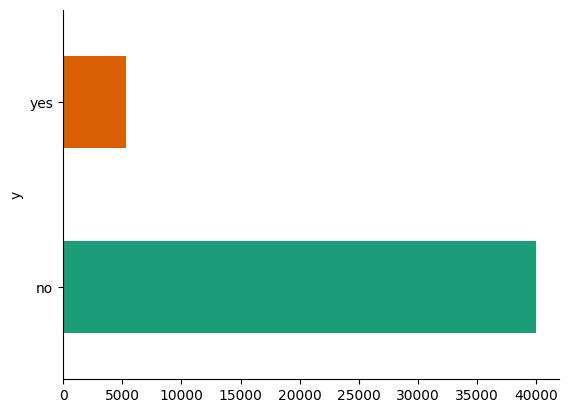

In [ ]:
# graph of y

from matplotlib import pyplot as plt
import seaborn as sns
y.groupby('y').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df=pd.merge(y, X, right_index=True, left_index=True)
df

,y,age,job,marital,education,default,balance,housing,loan,contact,day_of_week,month,duration,campaign,pdays,previous,poutcome
0,no,58,management,married,tertiary,no,2143,yes,no,NaN,5,may,261,1,-1,0,NaN
1,no,44,technician,single,secondary,no,29,yes,no,NaN,5,may,151,1,-1,0,NaN
2,no,33,entrepreneur,married,secondary,no,2,yes,yes,NaN,5,may,76,1,-1,0,NaN
3,no,47,blue-collar,married,NaN,no,1506,yes,no,NaN,5,may,92,1,-1,0,NaN
4,no,33,NaN,single,NaN,no,1,no,no,NaN,5,may,198,1,-1,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,yes,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,NaN
45207,yes,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,NaN
45208,yes,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success
45209,no,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,NaN


In [ ]:
# データフレーム（行列）の形：shape of data matrix
df.shape

(45211, 17)

In [ ]:
#データフレームの情報: data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   y            45211 non-null  object
 1   age          45211 non-null  int64 
 2   job          44923 non-null  object
 3   marital      45211 non-null  object
 4   education    43354 non-null  object
 5   default      45211 non-null  object
 6   balance      45211 non-null  int64 
 7   housing      45211 non-null  object
 8   loan         45211 non-null  object
 9   contact      32191 non-null  object
 10  day_of_week  45211 non-null  int64 
 11  month        45211 non-null  object
 12  duration     45211 non-null  int64 
 13  campaign     45211 non-null  int64 
 14  pdays        45211 non-null  int64 
 15  previous     45211 non-null  int64 
 16  poutcome     8252 non-null   object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


int64:64ビットの符号付き整数、object:文字型変数

In [ ]:
y.head()

,y
0,no
1,no
2,no
3,no
4,no


No charts were generated by quickchart


In [ ]:
import pandas as pd

In [ ]:
len(X)

NameError: name 'X' is not defined

In [ ]:
X["job"]sum()

SyntaxError: invalid syntax (<ipython-input-2-84f7be2a67ec>, line 1)

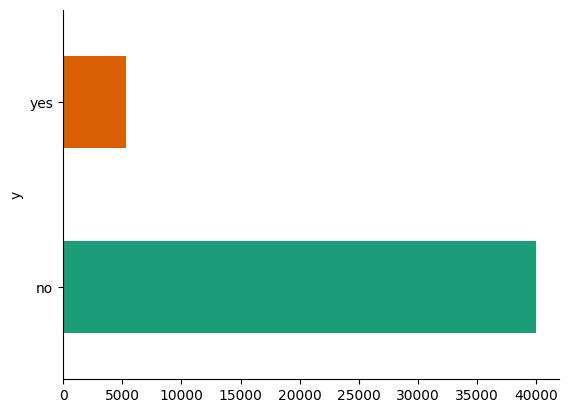

In [ ]:
# @title y

from matplotlib import pyplot as plt
import seaborn as sns
y.groupby('y').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
df_pivot = X.pivot_table(index=’氏名’, columns=’job’,values=’売上金額’, aggfunc=’sum’)
df_pivot

In [ ]:
%matplotlib inline

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#df = pd.read_csv('../content/bank-additional-full.csv', sep=';')

In [ ]:
df['y']

0         no
1         no
2         no
3         no
4         no
        ... 
41183    yes
41184     no
41185     no
41186    yes
41187     no
Name: y, Length: 41188, dtype: object

0          management
1          technician
2        entrepreneur
3         blue-collar
4                 NaN
             ...     
45206      technician
45207         retired
45208         retired
45209     blue-collar
45210    entrepreneur
Name: job, Length: 45211, dtype: object

In [ ]:
pd.crosstab(df["job"], df['campaign'])

campaign,1,2,3,4,5,6,7,8,9,10,...,33,34,35,37,39,40,41,42,43,56
job,,,,,,,,,,,,,,,,,,,,,
admin.,4408,2667,1329,690,427,269,149,88,78,70,...,2,1,1,0,0,1,0,0,1,1
blue-collar,3929,2388,1255,562,367,230,143,92,49,48,...,0,0,1,0,0,0,1,0,0,0
entrepreneur,596,420,191,85,60,23,24,12,8,5,...,0,0,0,0,1,0,0,0,0,0
housemaid,459,269,119,73,39,27,16,14,10,6,...,0,0,0,0,0,0,0,0,0,0
management,1280,781,355,187,106,53,51,23,20,12,...,0,1,1,0,0,0,0,0,0,0
retired,788,428,209,125,54,31,17,18,9,7,...,0,0,0,0,0,0,0,1,0,0
self-employed,581,344,214,105,61,29,27,11,6,11,...,0,0,0,0,0,1,0,0,0,0
services,1653,1059,522,244,155,106,57,42,33,17,...,1,0,2,0,0,0,0,0,0,0
student,434,221,102,55,22,15,8,7,4,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
df['y'].apply(lambda x: 1 if x == 'yes' else 0)

0        0
1        0
2        0
3        0
4        0
        ..
41183    1
41184    0
41185    0
41186    1
41187    0
Name: y, Length: 41188, dtype: int64

In [ ]:
df['conversion'] = df['y'].apply(lambda x: 1 if x == 'yes' else 0)